In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
# import sys

# sys.setrecursionlimit(10000)


def site_percolation(edges, n):
    p = np.random.random(n)[np.asarray(edges)].max(axis=1)
    order = np.argsort(p)
    for i in order:
        yield p[i], edges[i]


def edge_percolation(edges, n=None):
    p = np.random.random(len(edges))
    order = np.argsort(p)
    for i in order:
        yield p[i], edges[i]


def rectangle(m, n):
    vertices = [(i,j) for i in range(m) for j in range(n)]
    mapping = {v: idx for  idx, v in enumerate(vertices)}

    def neighbors(v):
        i, j = v
        if i > 0:
            yield i-1, j
        if j > 0:
            yield i, j-1

    edges = [(idx, mapping[v1]) for idx, v0 in enumerate(vertices) for v1 in neighbors(v0)]
    return vertices, edges

def rectangle8(m, n):
    vertices = [(i,j) for i in range(m) for j in range(n)]
    mapping = {v: idx for  idx, v in enumerate(vertices)}

    def neighbors(v):
        i, j = v
        for j0 in range(j-1, j+2):
            if (i-1, j0) in mapping:
                yield i-1, j0
        if j>0:
            yield i, j-1
        
    edges = [(idx, mapping[v1]) for idx, v0 in enumerate(vertices) for v1 in neighbors(v0)]
    return vertices, edges

def triangle(m, n):
    vertices = [(i,j+i%2) for i in range(m) for j in range(0, n, 2)]
    mapping = {v: idx for  idx, v in enumerate(vertices)}

    def neighbors(v):
        i, j = v
        if i > 0:
            if j > 0:
                yield i-1, j-1
            if j+1 < n:
                yield i-1, j+1        
        if j > 1:
            yield i, j-2

    edges = [(idx, mapping[v1]) for idx, v0 in enumerate(vertices) for v1 in neighbors(v0)]
    return vertices, edges

def hexagon(m, n):
    shift = [1,0,0,1]
    vertices = [(i,j+shift[i%4]) for i in range(m) for j in range(0, n, 2)]
    mapping = {v: idx for  idx, v in enumerate(vertices)}

    def neighbors(v):
        i, j = v
        for j0 in range(j-1, j+2):
            if (i-1, j0) in mapping:
                yield i-1, j0

    edges = [(idx, mapping[v1]) for idx, v0 in enumerate(vertices) for v1 in neighbors(v0)]
    return vertices, edges



def root(roots, a):
    if roots[a]!=a:
        roots[a] = root(roots, roots[a])
    return roots[a]


def union(roots, ranks, sizes, a, b):
    ra = root(roots, a)
    rb = root(roots, b)
    if ra != rb:
        if ranks[ra] > ranks[rb]:
            ra, rb = rb, ra
        if ranks[ra] < ranks[rb]:
            roots[ra] = rb
            sizes[rb] += sizes[ra]
        else:
            roots[ra] = rb
            ranks[rb] += 1
            sizes[rb] += sizes[ra]
    return sizes[rb]


def max_comp_sizes(edge_iter, n):
    roots = [i for i in range(n)]
    sizes = [1]*n
    ranks = [0]*n
    max_size = 1
    for p, (a, b) in edge_iter:
        size = union(roots, ranks, sizes, a, b)
        if size > max_size:
            max_size = size
        yield p, max_size


def discretize(mon_iter, subdivision, default=1):
    it = iter(subdivision)
    value = default
    t = next(it)
    for s, v in mon_iter:
        if s < t:
            value = v
        else:
            yield value
            t = next(it)
            value = v
    for _ in it:
        yield value
    yield value


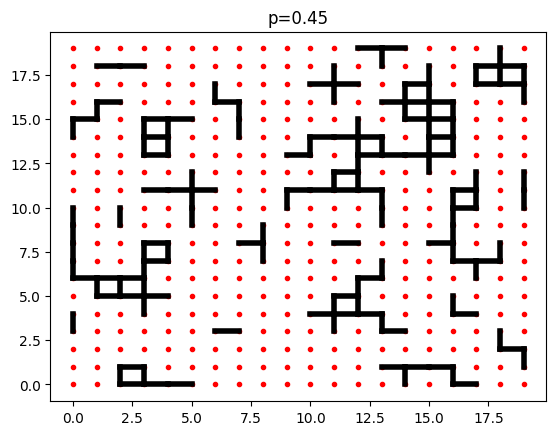

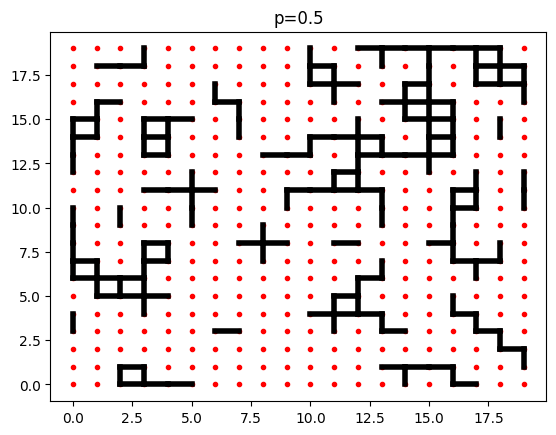

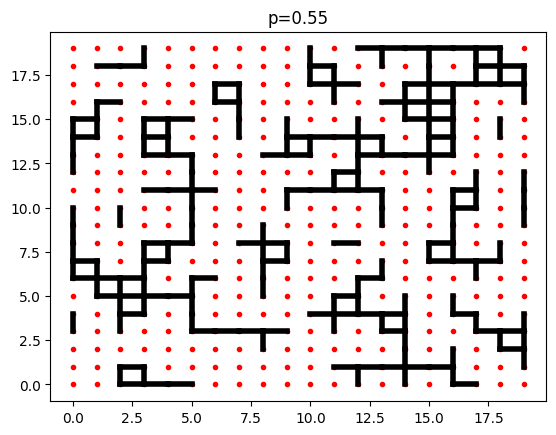

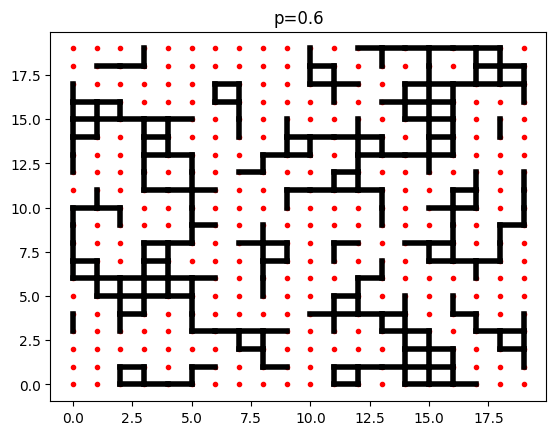

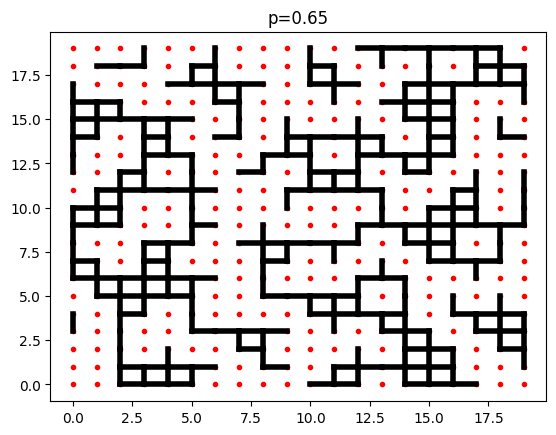

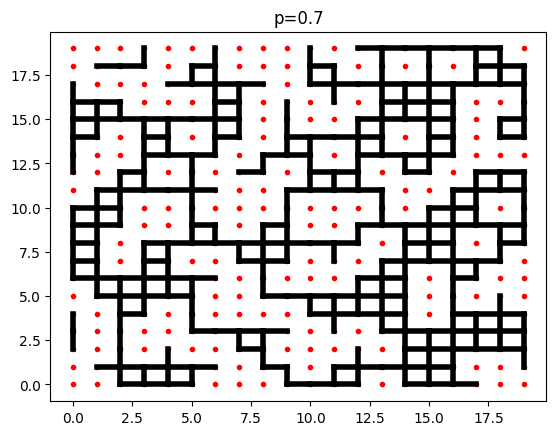

In [2]:
%matplotlib inline
vertices, edges = rectangle(20,20)
percolating_edges=list([e for e in site_percolation(edges, len(vertices))])
p_list=[0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
remaining_edges=[[] for k in range((len(p_list)))]
for i in percolating_edges:
  for idx, j in enumerate(p_list):
    if i[0]<j:
      remaining_edges[idx].append(i)
for idx, edges in enumerate(remaining_edges):
  x, y = zip(*vertices)
  plt.plot(x, y, 'r.')
  for _, (a, b) in edges:
    x0, y0 = vertices[a]
    x1, y1 = vertices[b]
    plt.plot((x0,x1), (y0,y1), c="black",lw=4)
  plt.title(f"p={p_list[idx]}")
  #plt.savefig(f"proba_triangle_site_perkolacio_{p_list[idx]}.pdf")
  plt.show()

# some test

In [3]:
vertices, edges = rectangle(4, 3)
print(f"{vertices=}\n{edges=}")
print("edge percolation")
print(*edge_percolation(edges, len(vertices)), sep="\n")
print("site percolation")
print(*site_percolation(edges, len(vertices)), sep="\n")


vertices=[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2)]
edges=[(1, 0), (2, 1), (3, 0), (4, 1), (4, 3), (5, 2), (5, 4), (6, 3), (7, 4), (7, 6), (8, 5), (8, 7), (9, 6), (10, 7), (10, 9), (11, 8), (11, 10)]
edge percolation
(0.1571450154765628, (3, 0))
(0.20182359224734325, (7, 4))
(0.3112740977697359, (4, 3))
(0.32634960412185765, (4, 1))
(0.3483433551316518, (8, 7))
(0.4356174783378176, (7, 6))
(0.44324765541650857, (11, 10))
(0.4821364432322389, (10, 9))
(0.5519824256659258, (1, 0))
(0.5573469860227453, (10, 7))
(0.6149208705758186, (5, 4))
(0.6227876870995037, (11, 8))
(0.6522556187173085, (2, 1))
(0.7369112550369805, (5, 2))
(0.8538455637895785, (6, 3))
(0.9376893594233362, (9, 6))
(0.9563082125968518, (8, 5))
site percolation
(0.024502191873144064, (2, 1))
(0.17852835705388415, (5, 2))
(0.6277205259017694, (1, 0))
(0.6783583983108329, (9, 6))
(0.6783583983108329, (7, 6))
(0.6917265335223136, (3, 0))
(0.6917265335223136, (6, 3))
(0.79

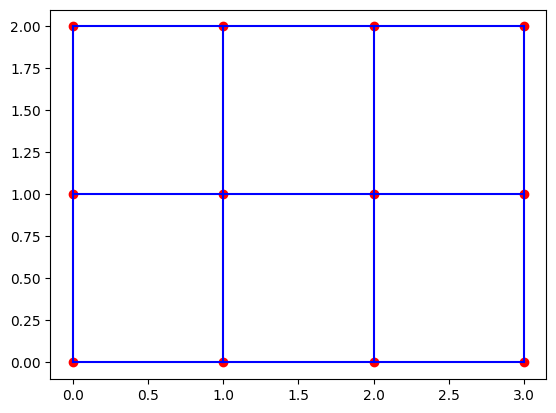

In [4]:
# import matplotlib
# matplotlib.use("TkAgg")
%matplotlib inline
x, y = zip(*vertices)
plt.plot(x, y, "ro")
for a, b in edges:
    x0, y0 = vertices[a]
    x1, y1 = vertices[b]
    plt.plot((x0,x1), (y0,y1), c="blue")
plt.show()


In [5]:
vertices, edges = rectangle8(4, 3)
print(f"{vertices=}\n{edges=}")
print("edge percolation")
print(*edge_percolation(edges, len(vertices)), sep="\n")
print("site percolation")
print(*site_percolation(edges, len(vertices)), sep="\n")


vertices=[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2)]
edges=[(1, 0), (2, 1), (3, 0), (3, 1), (4, 0), (4, 1), (4, 2), (4, 3), (5, 1), (5, 2), (5, 4), (6, 3), (6, 4), (7, 3), (7, 4), (7, 5), (7, 6), (8, 4), (8, 5), (8, 7), (9, 6), (9, 7), (10, 6), (10, 7), (10, 8), (10, 9), (11, 7), (11, 8), (11, 10)]
edge percolation
(0.03233838427270219, (10, 8))
(0.034603214834025176, (11, 7))
(0.04104701424533452, (4, 2))
(0.159760655509679, (4, 1))
(0.16098728766161174, (5, 2))
(0.1913618237038801, (3, 1))
(0.2008875062202523, (10, 9))
(0.21123077744596652, (9, 6))
(0.2899696786445737, (8, 4))
(0.29603575440861274, (11, 8))
(0.3325178125574163, (6, 4))
(0.43125937863502306, (7, 4))
(0.4471894304346169, (3, 0))
(0.4525659360903639, (1, 0))
(0.4601361757610659, (5, 1))
(0.5038936395049882, (2, 1))
(0.511657373108946, (7, 6))
(0.5457810312998903, (7, 5))
(0.5484933508875683, (6, 3))
(0.6479200410794057, (10, 7))
(0.692361349607393, (9, 7))
(0.77148125

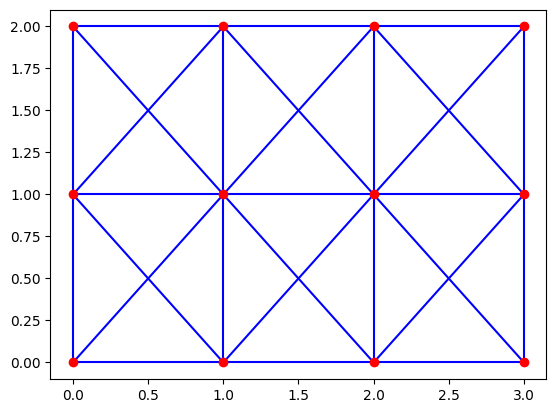

In [6]:
x, y = zip(*vertices)
for a, b in edges:
    x0, y0 = vertices[a]
    x1, y1 = vertices[b]
    plt.plot((x0,x1), (y0,y1), c="blue")
plt.plot(x, y, "ro")

plt.show()


In [7]:
vertices, edges = triangle(4, 6)
print(f"{vertices=}\n{edges=}")
print("edge percolation")
print(*edge_percolation(edges, len(vertices)), sep="\n")
print("site percolation")
print(*site_percolation(edges, len(vertices)), sep="\n")


vertices=[(0, 0), (0, 2), (0, 4), (1, 1), (1, 3), (1, 5), (2, 0), (2, 2), (2, 4), (3, 1), (3, 3), (3, 5)]
edges=[(1, 0), (2, 1), (3, 0), (3, 1), (4, 1), (4, 2), (4, 3), (5, 2), (5, 4), (6, 3), (7, 3), (7, 4), (7, 6), (8, 4), (8, 5), (8, 7), (9, 6), (9, 7), (10, 7), (10, 8), (10, 9), (11, 8), (11, 10)]
edge percolation
(0.0339407949024404, (5, 2))
(0.04684591043754416, (11, 10))
(0.051302727920564006, (3, 1))
(0.060381269418293915, (7, 6))
(0.11084716321424781, (4, 2))
(0.16033291619668688, (3, 0))
(0.17475153565613244, (6, 3))
(0.20342565276943025, (10, 7))
(0.29141402051388077, (4, 1))
(0.4215114263293518, (11, 8))
(0.5047167248663659, (8, 4))
(0.5218895476093907, (4, 3))
(0.5924201932739614, (5, 4))
(0.6106371043054061, (9, 6))
(0.6593731204385918, (8, 5))
(0.6842613339311747, (7, 4))
(0.7788694824674945, (7, 3))
(0.7853329859253446, (1, 0))
(0.7876626716411893, (10, 9))
(0.8414818757570741, (9, 7))
(0.882000204535575, (10, 8))
(0.9687005345264501, (2, 1))
(0.9954357850347155, (8, 7)

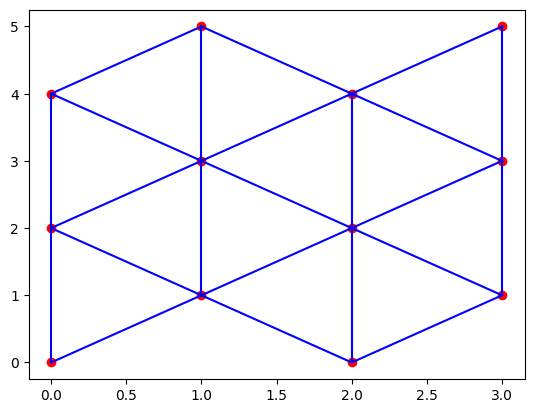

In [8]:
x, y = zip(*vertices)
plt.plot(x, y, "ro")
for a, b in edges:
    x0, y0 = vertices[a]
    x1, y1 = vertices[b]
    plt.plot((x0,x1), (y0,y1), c="blue")
plt.show()


In [9]:
vertices, edges = hexagon(8, 10)
print(f"{vertices=}\n{edges=}")
print("edge percolation")
print(*edge_percolation(edges, len(vertices)), sep="\n")
print("site percolation")
print(*site_percolation(edges, len(vertices)), sep="\n")


vertices=[(0, 1), (0, 3), (0, 5), (0, 7), (0, 9), (1, 0), (1, 2), (1, 4), (1, 6), (1, 8), (2, 0), (2, 2), (2, 4), (2, 6), (2, 8), (3, 1), (3, 3), (3, 5), (3, 7), (3, 9), (4, 1), (4, 3), (4, 5), (4, 7), (4, 9), (5, 0), (5, 2), (5, 4), (5, 6), (5, 8), (6, 0), (6, 2), (6, 4), (6, 6), (6, 8), (7, 1), (7, 3), (7, 5), (7, 7), (7, 9)]
edges=[(5, 0), (6, 0), (6, 1), (7, 1), (7, 2), (8, 2), (8, 3), (9, 3), (9, 4), (10, 5), (11, 6), (12, 7), (13, 8), (14, 9), (15, 10), (15, 11), (16, 11), (16, 12), (17, 12), (17, 13), (18, 13), (18, 14), (19, 14), (20, 15), (21, 16), (22, 17), (23, 18), (24, 19), (25, 20), (26, 20), (26, 21), (27, 21), (27, 22), (28, 22), (28, 23), (29, 23), (29, 24), (30, 25), (31, 26), (32, 27), (33, 28), (34, 29), (35, 30), (35, 31), (36, 31), (36, 32), (37, 32), (37, 33), (38, 33), (38, 34), (39, 34)]
edge percolation
(0.04114311782955549, (12, 7))
(0.050035581309410326, (29, 23))
(0.051425799546884865, (38, 33))
(0.0727424420819277, (16, 12))
(0.07338215522688774, (6, 0))
(

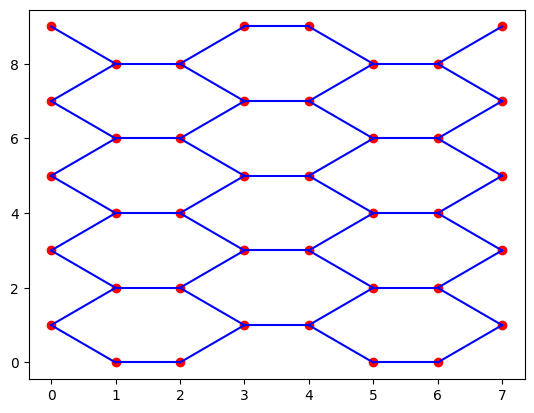

In [10]:
x, y = zip(*vertices)
plt.plot(x, y, "ro")
for a, b in edges:
    x0, y0 = vertices[a]
    x1, y1 = vertices[b]
    plt.plot((x0,x1), (y0,y1), c="blue")
plt.show()


# site percolation

In [11]:
%%time

vertices, edges = rectangle(150, 150)
p_seq = np.linspace(0, 1, 1001)
comp_size = np.zeros_like(p_seq)
for _ in range(200):
    sizes = list(discretize(max_comp_sizes(site_percolation(edges, len(vertices)),
                                  len(vertices)),
                            p_seq))
    comp_size += np.array(sizes)
comp_size /= 200


CPU times: user 24.5 s, sys: 57.4 ms, total: 24.6 s
Wall time: 28.7 s


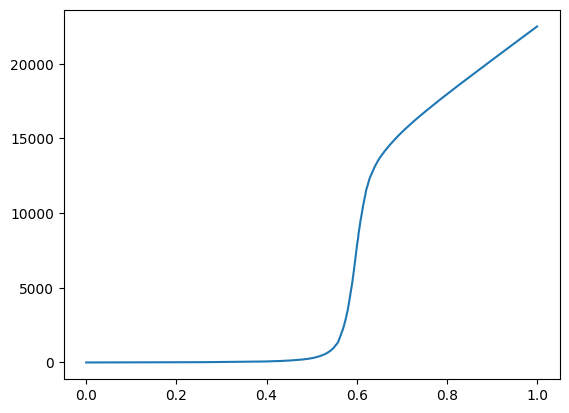

In [12]:
plt.plot(p_seq, comp_size)
plt.show()

In [13]:
%%time

vertices, edges = rectangle8(100, 100)
p_seq = np.linspace(0, 1, 1001)
comp_size = np.zeros_like(p_seq)
for _ in range(100):
    sizes = list(discretize(max_comp_sizes(site_percolation(edges, len(vertices)),
                                  len(vertices)),
                            p_seq))
    comp_size += np.array(sizes)
comp_size /= 100


CPU times: user 8.82 s, sys: 15.5 ms, total: 8.83 s
Wall time: 8.9 s


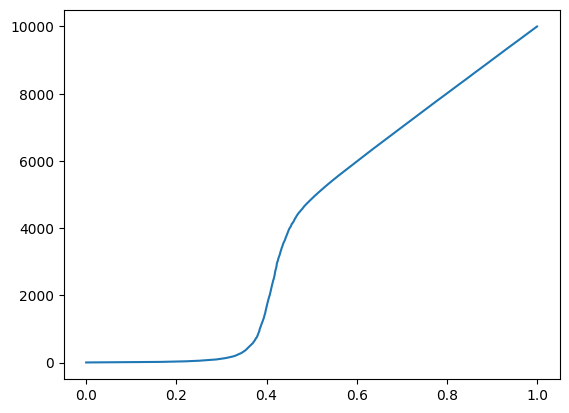

In [14]:
plt.plot(p_seq, comp_size)
plt.show()

In [15]:
%%time

vertices, edges = triangle(100, 200)
p_seq = np.linspace(0, 1, 1001)
comp_size = np.zeros_like(p_seq)
for _ in range(100):
    sizes = list(discretize(max_comp_sizes(site_percolation(edges, len(vertices)),
                                  len(vertices)),
                            p_seq))
    comp_size += np.array(sizes)
comp_size /= 100


CPU times: user 7.32 s, sys: 30.8 ms, total: 7.35 s
Wall time: 7.41 s


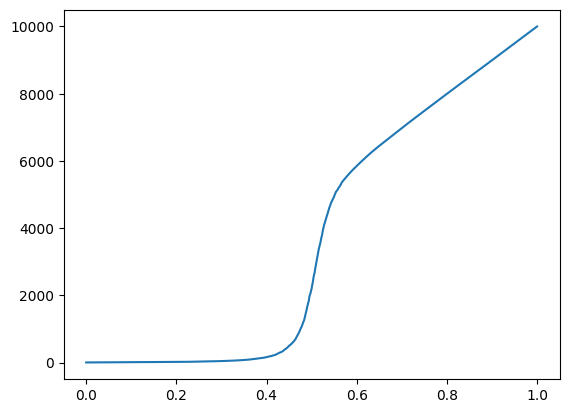

In [16]:
plt.plot(p_seq, comp_size)
plt.show()

In [17]:
%%time

vertices, edges = hexagon(100, 200)
p_seq = np.linspace(0, 1, 1001)
comp_size = np.zeros_like(p_seq)
for _ in range(100):
    sizes = list(discretize(max_comp_sizes(site_percolation(edges, len(vertices)),
                                  len(vertices)),
                            p_seq))
    comp_size += np.array(sizes)
comp_size /= 100


CPU times: user 3.26 s, sys: 9.31 ms, total: 3.27 s
Wall time: 3.28 s


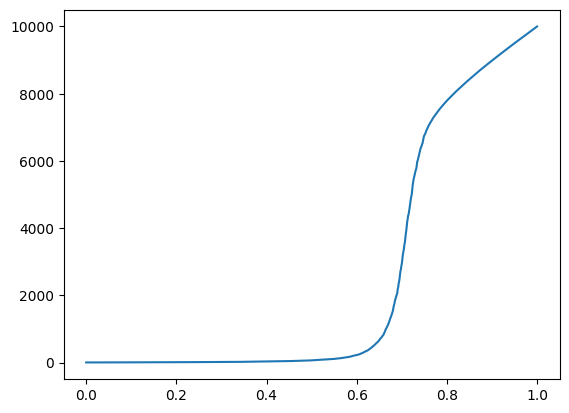

In [18]:
plt.plot(p_seq, comp_size)
plt.show()

# edge percolation

In [19]:
%%time

vertices, edges = rectangle(150, 150)
p_seq = np.linspace(0, 1, 1001)
comp_size = np.zeros_like(p_seq)
for _ in range(100):
    sizes = list(discretize(max_comp_sizes(edge_percolation(edges, len(vertices)),
                                  len(vertices)),
                            p_seq))
    comp_size += np.array(sizes)
comp_size /= 100


CPU times: user 9.86 s, sys: 24.5 ms, total: 9.88 s
Wall time: 10.5 s


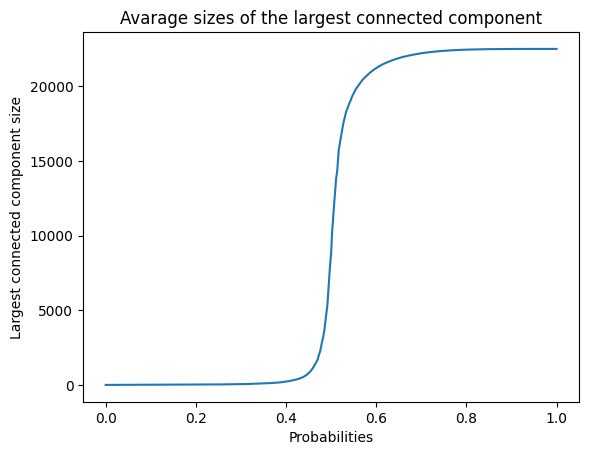

In [20]:
plt.plot(p_seq, comp_size)
plt.title('Avarage sizes of the largest connected component')
plt.xlabel('Probabilities')
plt.ylabel('Largest connected component size')
plt.show()

In [21]:
%%time

vertices, edges = rectangle8(100, 100)
p_seq = np.linspace(0, 1, 1001)
comp_size = np.zeros_like(p_seq)
for _ in range(100):
    sizes = list(discretize(max_comp_sizes(edge_percolation(edges, len(vertices)),
                                  len(vertices)),
                            p_seq))
    comp_size += np.array(sizes)
comp_size /= 100


CPU times: user 6.61 s, sys: 23.4 ms, total: 6.64 s
Wall time: 6.64 s


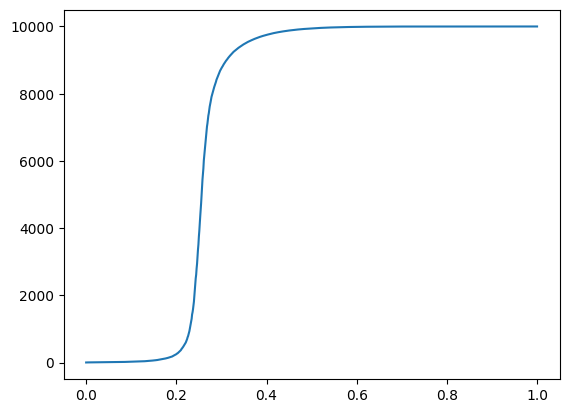

In [22]:
plt.plot(p_seq, comp_size)
plt.show()

In [23]:
%%time

vertices, edges = triangle(100, 200)
p_seq = np.linspace(0, 1, 1001)
comp_size = np.zeros_like(p_seq)
for _ in range(100):
    sizes = list(discretize(max_comp_sizes(edge_percolation(edges, len(vertices)),
                                  len(vertices)),
                            p_seq))
    comp_size += np.array(sizes)
comp_size /= 100


CPU times: user 5.73 s, sys: 10.7 ms, total: 5.74 s
Wall time: 5.79 s


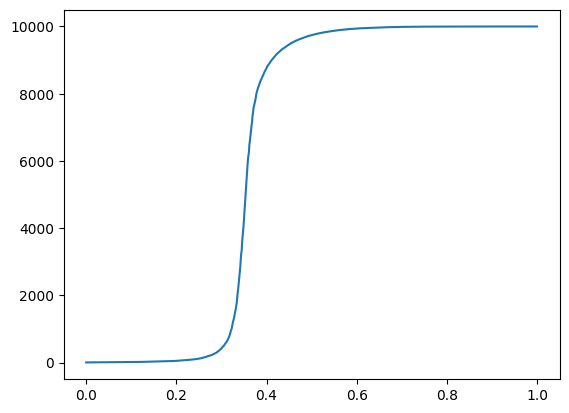

In [24]:
plt.plot(p_seq, comp_size)
plt.show()

In [25]:
%%time

vertices, edges = hexagon(100, 200)
p_seq = np.linspace(0, 1, 1001)
comp_size = np.zeros_like(p_seq)
for _ in range(100):
    sizes = list(discretize(max_comp_sizes(edge_percolation(edges, len(vertices)),
                                  len(vertices)),
                            p_seq))
    comp_size += np.array(sizes)
comp_size /= 100


CPU times: user 2.57 s, sys: 8.71 ms, total: 2.57 s
Wall time: 2.58 s


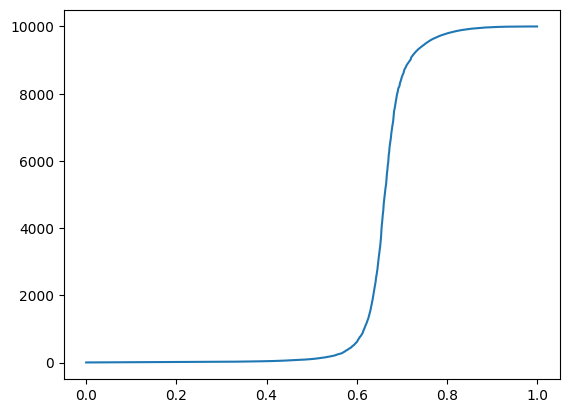

In [26]:
plt.plot(p_seq, comp_size)
plt.show()

# Próbák

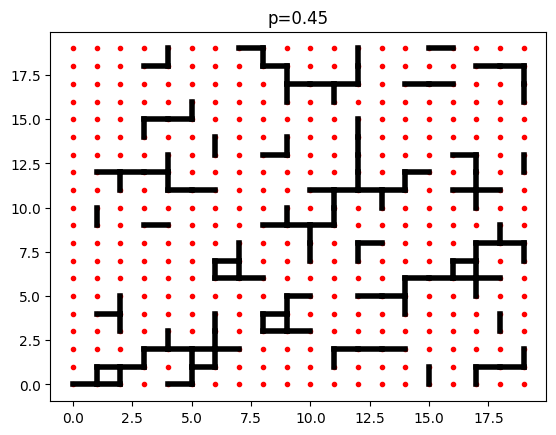

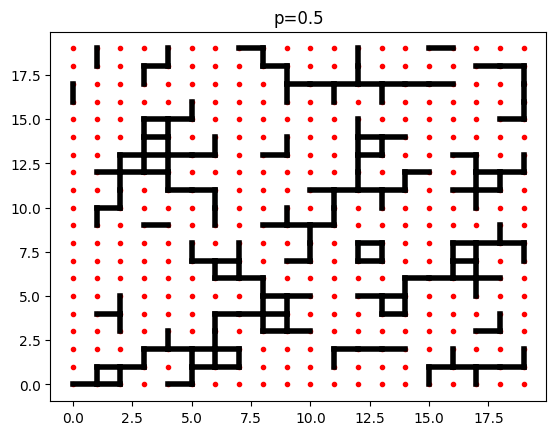

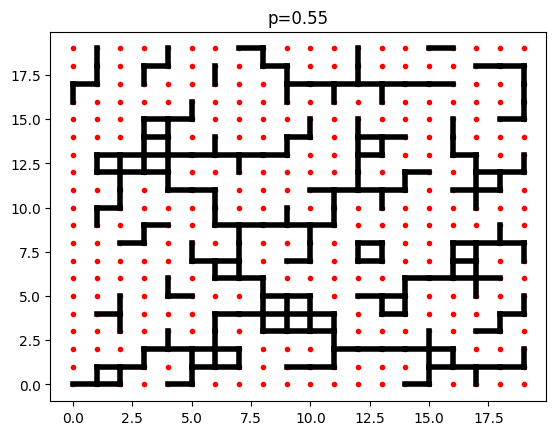

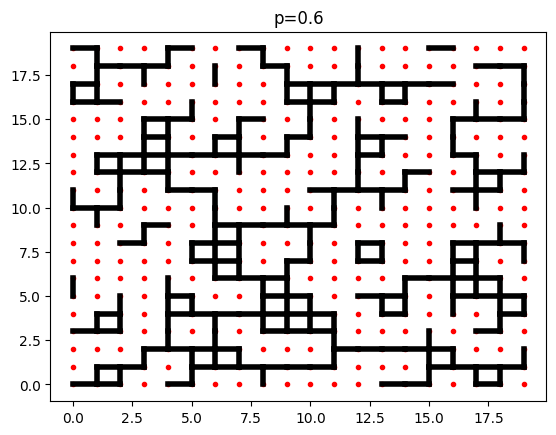

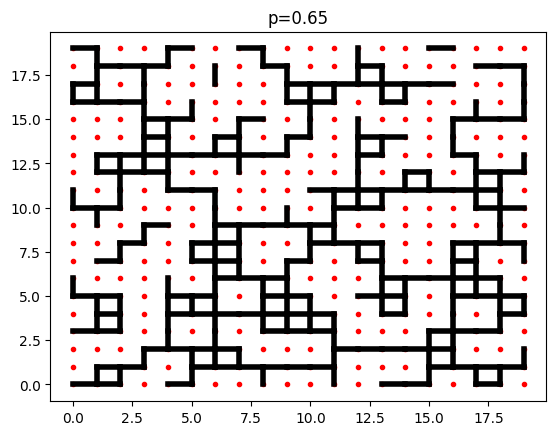

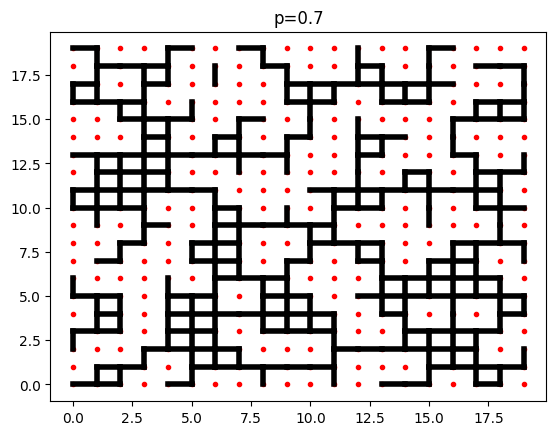

In [27]:
%matplotlib inline
vertices, edges = rectangle(20,20)
percolating_edges=list([e for e in site_percolation(edges, len(vertices))])
p_list=[0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
remaining_edges=[[] for k in range((len(p_list)))]
for i in percolating_edges:
  for idx, j in enumerate(p_list):
    if i[0]<j:
      remaining_edges[idx].append(i)
for idx, edges in enumerate(remaining_edges):
  x, y = zip(*vertices)
  plt.plot(x, y, 'r.')
  for _, (a, b) in edges:
    x0, y0 = vertices[a]
    x1, y1 = vertices[b]
    plt.plot((x0,x1), (y0,y1), c="black",lw=4)
  plt.title(f"p={p_list[idx]}")
  #plt.savefig(f"proba_rectangle_site_perkolacio_{p_list[idx]}.pdf")
  plt.show()

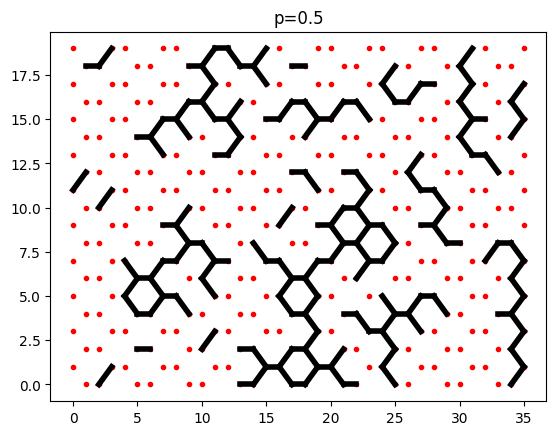

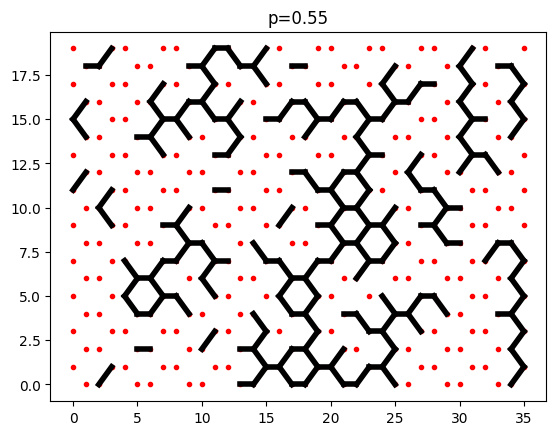

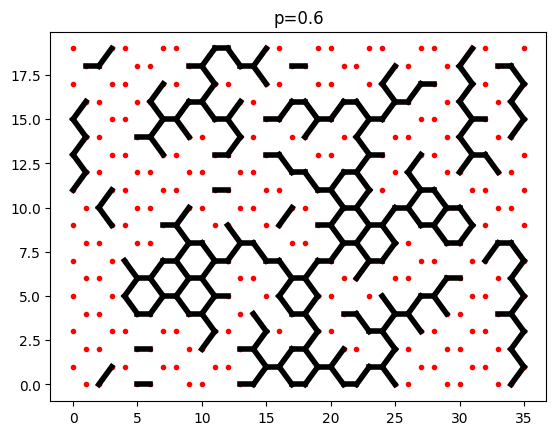

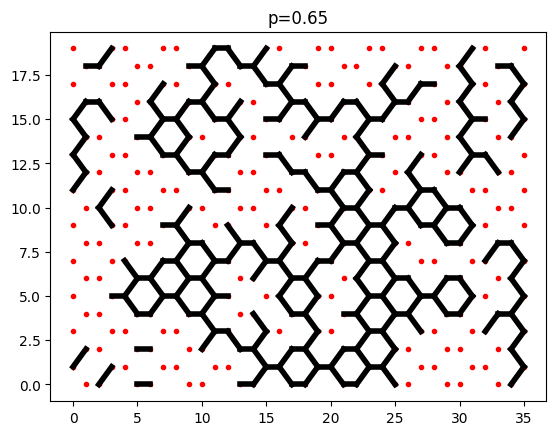

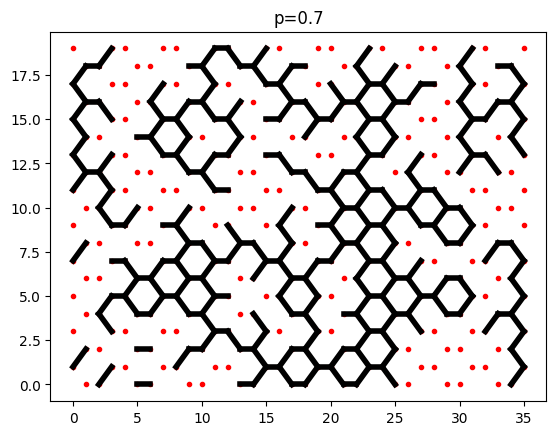

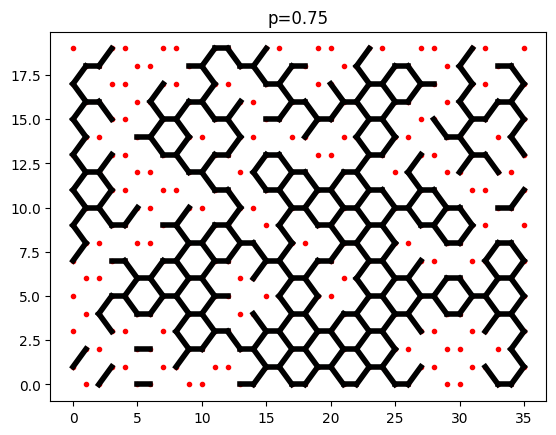

In [28]:
vertices, edges = hexagon(36,20)
percolating_edges=list([e for e in site_percolation(edges, len(vertices))])
p_list=[0.5, 0.55, 0.6, 0.65, 0.7,0.75]
remaining_edges=[[] for k in range((len(p_list)))]
for i in percolating_edges:
  for idx, j in enumerate(p_list):
    if i[0]<j:
      remaining_edges[idx].append(i)
for idx, edges in enumerate(remaining_edges):
  x, y = zip(*vertices)
  plt.plot(x, y, 'r.')
  for _, (a, b) in edges:
    x0, y0 = vertices[a]
    x1, y1 = vertices[b]
    plt.plot((x0,x1), (y0,y1), c="black",lw=4)
  plt.title(f"p={p_list[idx]}")
  #plt.savefig(f"proba_hexagon_site_perkolacio_{p_list[idx]}.pdf")
  plt.show()

In [29]:
%%time
comp_size_all=[]
n_list=[25,30,35,40,50,60,70,80,100,120,140,160,180,200,230,250]
for n in n_list:
  print(n)
  vertices, edges = rectangle(n, n)
  p_seq = np.linspace(0, 1, 1001)
  comp_size = np.zeros_like(p_seq)
  for _ in range(100):
      sizes = list(discretize(max_comp_sizes(edge_percolation(edges, len(vertices)),
                                  len(vertices)),
                              p_seq))
      comp_size += np.array(sizes)
  comp_size /= 100
  comp_size /= n*n
  comp_size_all.append(comp_size)

25
30
35
40
50
60
70
80
100
120
140
160
180
200
230
250
CPU times: user 2min 6s, sys: 344 ms, total: 2min 6s
Wall time: 2min 7s


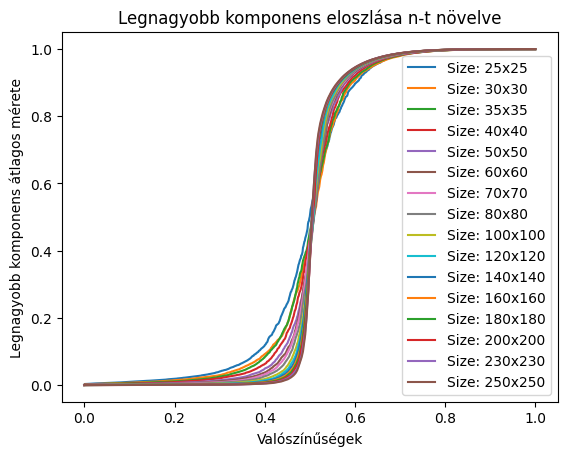

In [30]:
for idx, n in enumerate(n_list):
  plt.plot(p_seq, comp_size_all[idx], label=f"Size: {n}x{n}")
plt.title('Legnagyobb komponens eloszlása n-t növelve')
plt.xlabel('Valószínűségek')
plt.ylabel('Legnagyobb komponens átlagos mérete')
plt.legend()
#plt.savefig("max_component_distribution_edge_rectangle.pdf")
plt.show()

In [31]:
%%time
comp_size_all=[]
n_list=[50,100,200,400,500]
for n in n_list:
  print(n)
  vertices, edges = hexagon(n, n)
  p_seq = np.linspace(0, 1, 1001)
  comp_size = np.zeros_like(p_seq)
  for _ in range(100):
      sizes = list(discretize(max_comp_sizes(site_percolation(edges, len(vertices)),
                                  len(vertices)),
                              p_seq))
      comp_size += np.array(sizes)
  comp_size /= 100
  comp_size /= n*n
  comp_size_all.append(comp_size)

50
100
200
400
500
CPU times: user 1min 44s, sys: 382 ms, total: 1min 45s
Wall time: 1min 45s


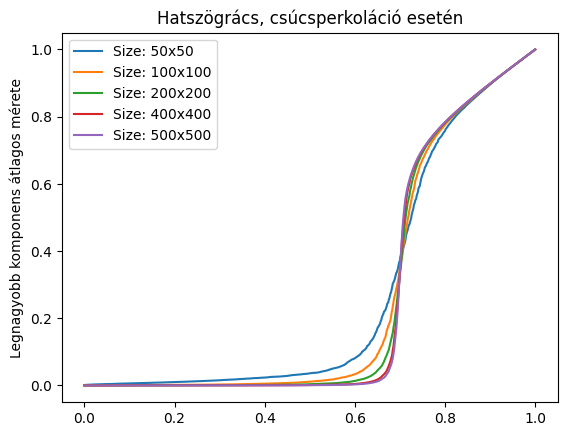

In [32]:
for idx, n in enumerate(n_list):
  plt.plot(p_seq, 2*comp_size_all[idx], label=f"Size: {n}x{n}")
plt.title('Hatszögrács, csúcsperkoláció esetén')
#plt.xlabel('Valószínűségek')
plt.ylabel('Legnagyobb komponens átlagos mérete')
plt.legend()
#plt.savefig("max_component_distribution_site_hexagon.pdf")
plt.show()

In [35]:
%%time
comp_size_all=[]
n_list=[40,45,50,60,70,80,100,120,150,200,300,500]
for n in n_list:
  print(n)
  vertices, edges = triangle(n, n)
  p_seq = np.linspace(0, 1, 1001)
  comp_size = np.zeros_like(p_seq)
  for _ in range(100):
      sizes = list(discretize(max_comp_sizes(site_percolation(edges, len(vertices)),
                                  len(vertices)),
                              p_seq))
      comp_size += np.array(sizes)
  comp_size /= 100
  comp_size /= n*n
  comp_size_all.append(comp_size)

40
45
50
60
70
80
100
120
150
200
300
500
CPU times: user 2min 51s, sys: 846 ms, total: 2min 52s
Wall time: 3min 1s


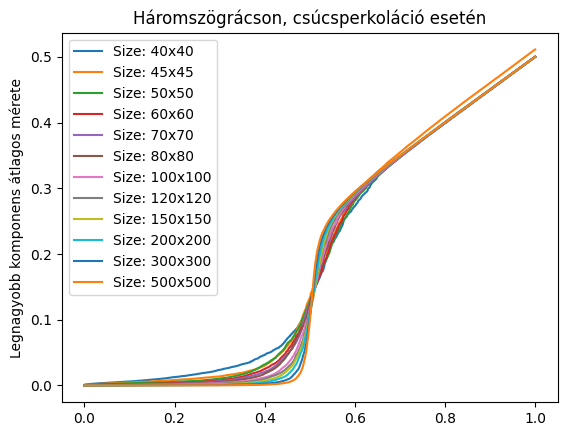

In [36]:
for idx, n in enumerate(n_list):
  plt.plot(p_seq, comp_size_all[idx], label=f"Size: {n}x{n}")
plt.title('Háromszögrácson, csúcsperkoláció esetén')
#plt.xlabel('Valószínűségek')
plt.ylabel('Legnagyobb komponens átlagos mérete')
plt.legend()
#plt.savefig("max_component_distribution_site_triangle.pdf")
plt.show()

In [37]:
%%time
comp_size_all=[]
n_list=[40,45,50,60,70,80,100,120,150,200,300,500]
for n in n_list:
  print(n)
  vertices, edges = triangle(n, n)
  p_seq = np.linspace(0, 1, 1001)
  comp_size = np.zeros_like(p_seq)
  for _ in range(100):
      sizes = list(discretize(max_comp_sizes(edge_percolation(edges, len(vertices)),
                                  len(vertices)),
                              p_seq))
      comp_size += np.array(sizes)
  comp_size /= 100
  comp_size /= n*n
  comp_size_all.append(comp_size)

40
45
50
60
70
80
100
120
150
200
300
500
CPU times: user 2min 41s, sys: 428 ms, total: 2min 41s
Wall time: 2min 43s


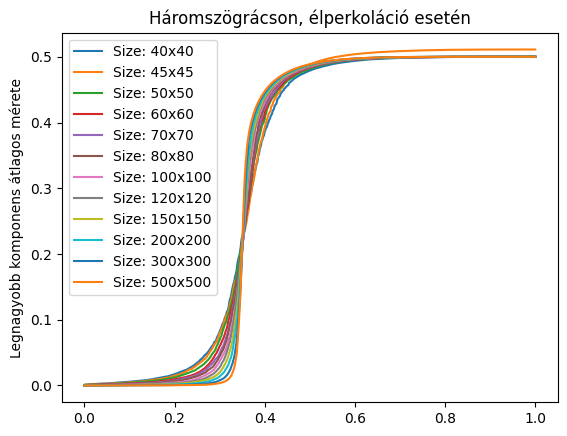

In [38]:
for idx, n in enumerate(n_list):
  plt.plot(p_seq, comp_size_all[idx], label=f"Size: {n}x{n}")
plt.title('Háromszögrácson, élperkoláció esetén')
#plt.xlabel('Valószínűségek')
plt.ylabel('Legnagyobb komponens átlagos mérete')
plt.legend()
#plt.savefig("max_component_distribution_edge_triangle.pdf")
plt.show()